In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
print(os.listdir("../content"))


['.config', 'Supermart Grocery Sales - Retail Analytics Dataset.csv', 'sample_data']


In [ ]:
sales=pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")
sales.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
sales['Order Date']= pd.to_datetime(sales['Order Date'], format='mixed')

In [ ]:
sales['Order Date'].dtype

dtype('<M8[ns]')

In [ ]:
type(sales['Order Date'])

pandas.core.series.Series

In [ ]:
sales['Order Date']=pd.to_datetime(sales['Order Date'])

In [ ]:
sales['day']=(sales['Order Date']).dt.day
sales['month']=(sales['Order Date']).dt.month
sales['year']=(sales['Order Date']).dt.year

In [ ]:
sales.describe()

,Order Date,Sales,Discount,Profit,day,month,year
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2017-04-30 05:17:08.056834048,1496.596158,0.226817,374.937082,15.468381,7.809686,2016.722233
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000,1.000000,1.000000,2015.000000
25%,2016-05-23 00:00:00,1000.000000,0.160000,180.022500,8.000000,5.000000,2016.000000
50%,2017-06-26 00:00:00,1498.000000,0.230000,320.780000,15.000000,9.000000,2017.000000
75%,2018-05-14 00:00:00,1994.750000,0.290000,525.627500,23.000000,11.000000,2018.000000
max,2018-12-30 00:00:00,2500.000000,0.350000,1120.950000,31.000000,12.000000,2018.000000
std,NaN,577.559036,0.074636,239.932881,8.748178,3.284654,1.123555


In [ ]:
categorical_columns=[cname for cname in sales.columns if sales[cname].dtype=='object']

In [ ]:
categorical_columns

['Order ID',
 'Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Region',
 'State']

In [ ]:
print('# unique values in customer name : {0}' . format(len(sales['Customer Name'].unique().tolist())))
print('# unique values in Category : {0}' . format(len(sales['Category'].unique().tolist())))
print('# unique values in Sub Category : {0}' . format(len(sales['Sub Category'].unique().tolist())))
print('# unique values in city : {0}' . format(len(sales['City'].unique().tolist())))
print('# unique values in Region: {0}' .format(len(sales['Region'].unique().tolist())))
print('# unique values in State : {0}'.format(len(sales['State'].unique().tolist())))


# unique values in customer name : 50
# unique values in Category : 7
# unique values in Sub Category : 23
# unique values in city : 24
# unique values in Region: 5
# unique values in State : 1


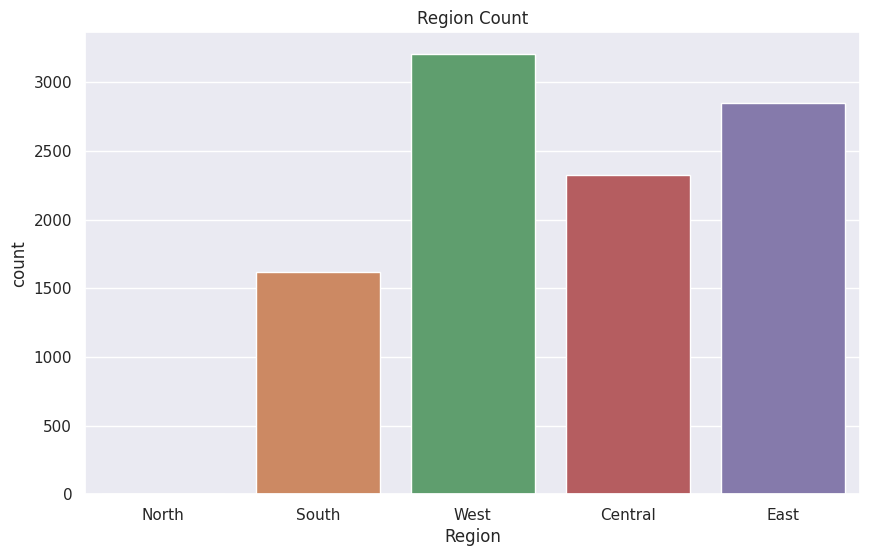

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.set(style="darkgrid")       #style the plot background to become a grid
RegionCount  = sns.countplot(x="Region", data =sales, hue="Region").set_title("Region Count")

<Axes: xlabel='Region', ylabel='Profit'>

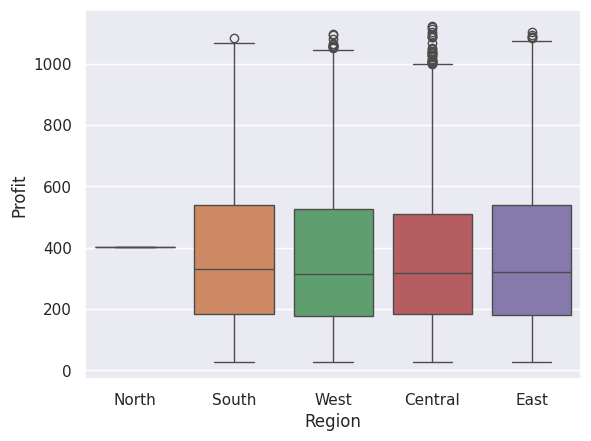

In [ ]:
sns.boxplot(x="Region", y="Profit", data=sales, hue="Region")

Central Region has lowest Profit

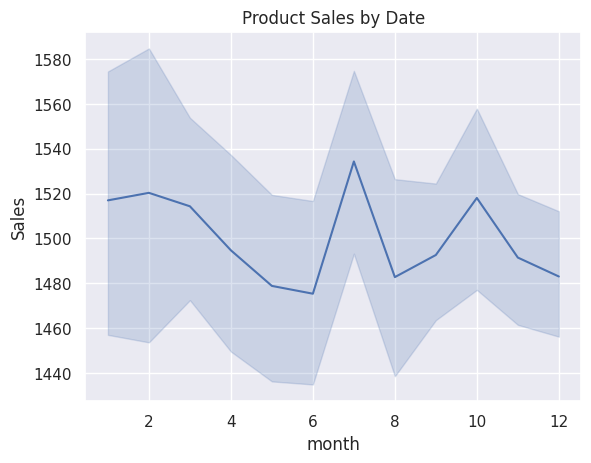

In [ ]:
RegionCount  = sns.lineplot(x="month",  y = 'Sales',data =sales).set_title("Product Sales by Date")

<Figure size 1000x800 with 0 Axes>

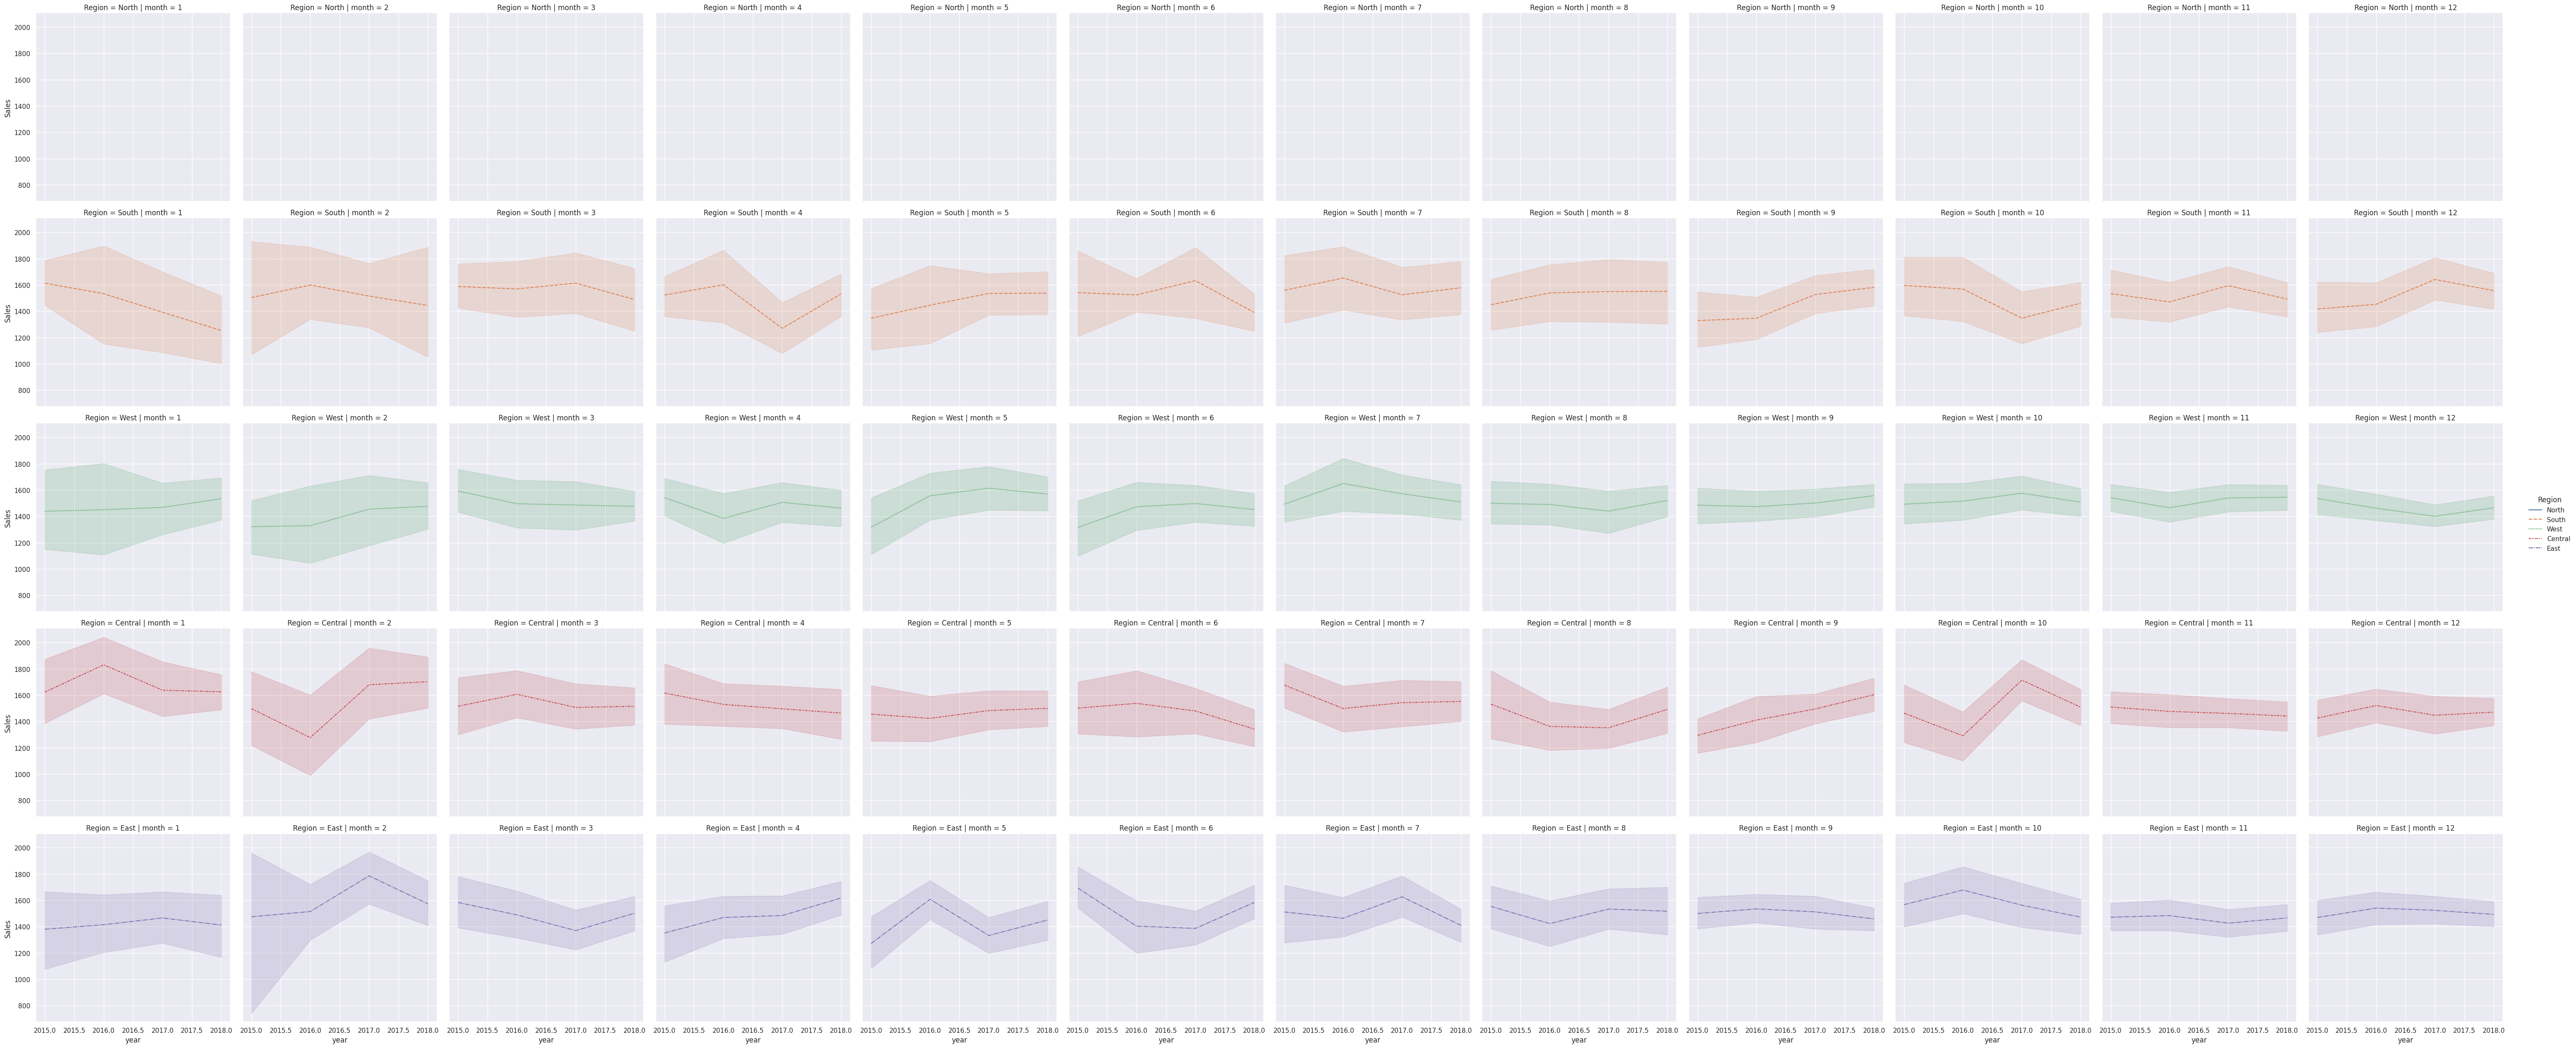

In [ ]:
plt.figure(figsize=(10,8)) # Adjust the figure size as needed
RegionCount  = sns.relplot(x="year",  y = 'Sales', col= 'month' , row= 'Region', kind="line", hue="Region", style="Region", data =sales)


<Figure size 1000x800 with 0 Axes>

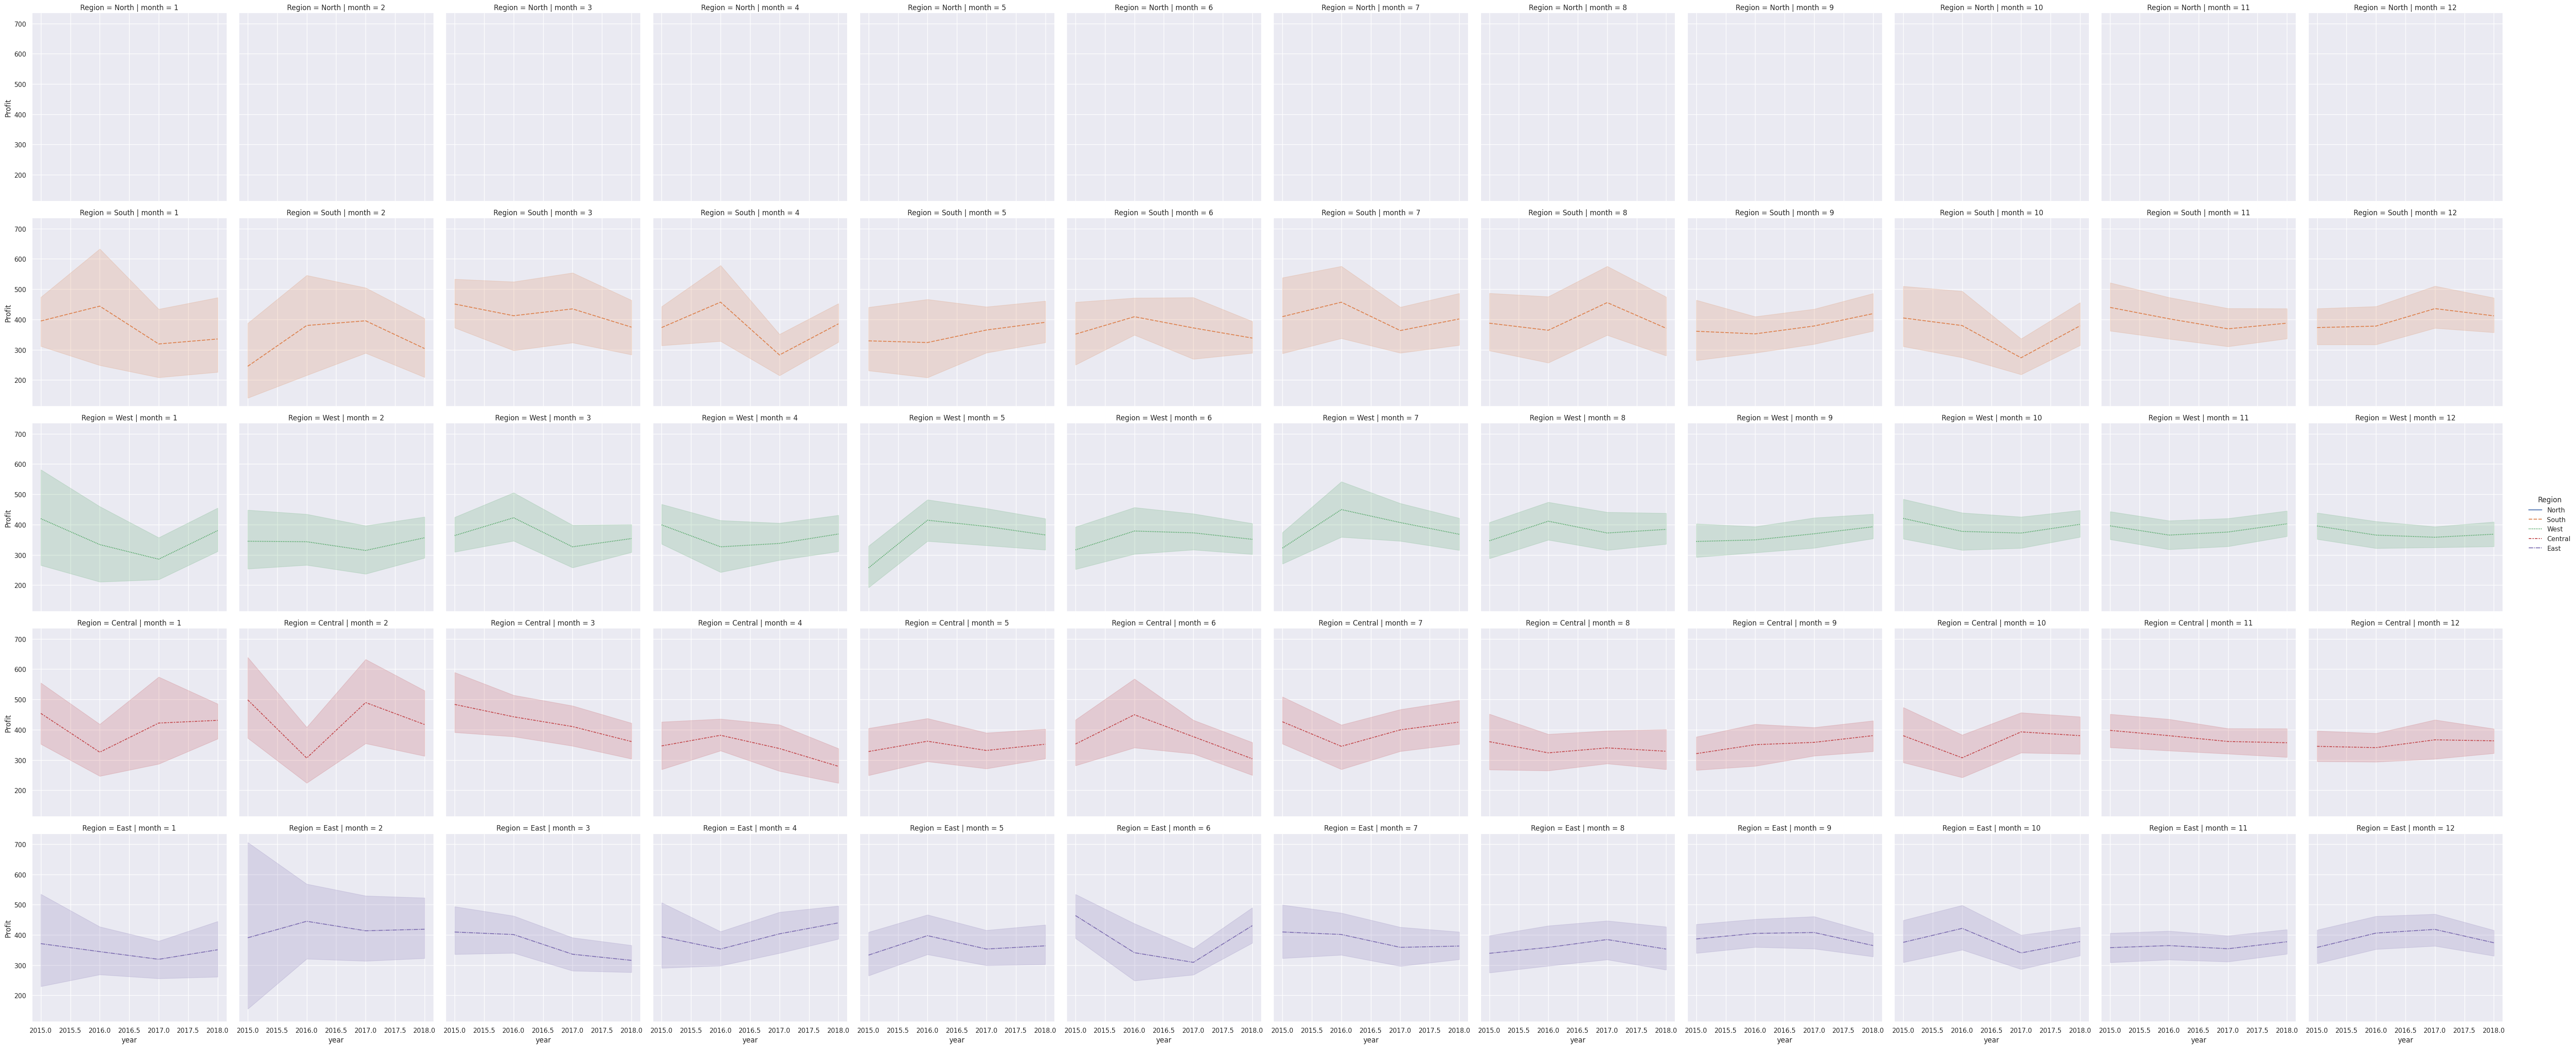

In [ ]:
plt.figure(figsize=(10,8)) # Adjust the figure size as needed
RegionCount  = sns.relplot(x="year",  y = 'Profit', col= 'month' , row= 'Region', kind="line", hue="Region", style="Region", data =sales)


Product Analysis


<Axes: xlabel='Sales', ylabel='Category'>

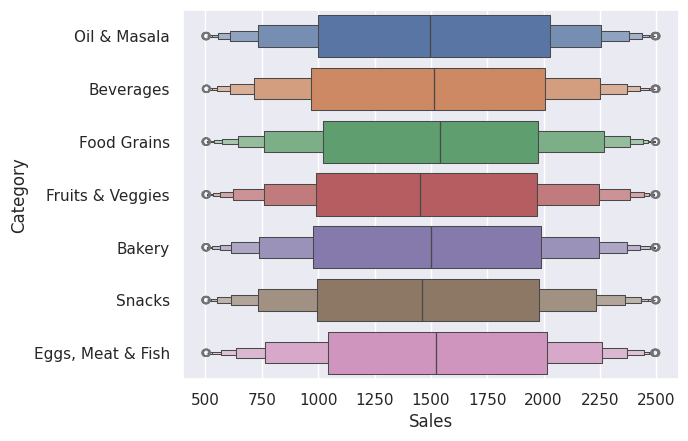

In [ ]:
sns.boxenplot(y='Category', x= 'Sales', data=sales, hue='Category')

<Axes: xlabel='count', ylabel='Category'>

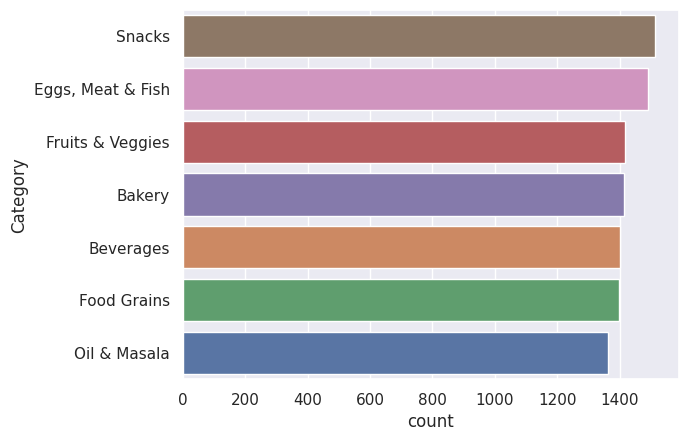

In [ ]:
sns.countplot(y = 'Category', data=sales, order = sales['Category'].value_counts().index, hue="Category" )

So, plot shows the top Category sold in our dataset. Snacks is the highest while Oil and Masala is the lowest


<Axes: xlabel='Profit', ylabel='Category'>

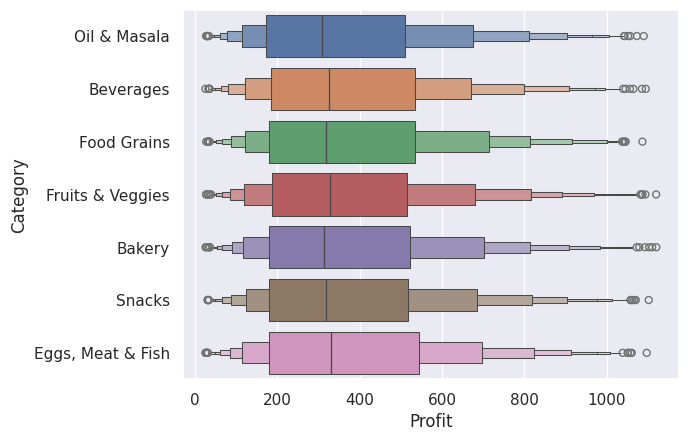

In [ ]:
sns.boxenplot(y="Category", x="Profit",data=sales, hue="Category")

<Axes: xlabel='count', ylabel='Sub Category'>

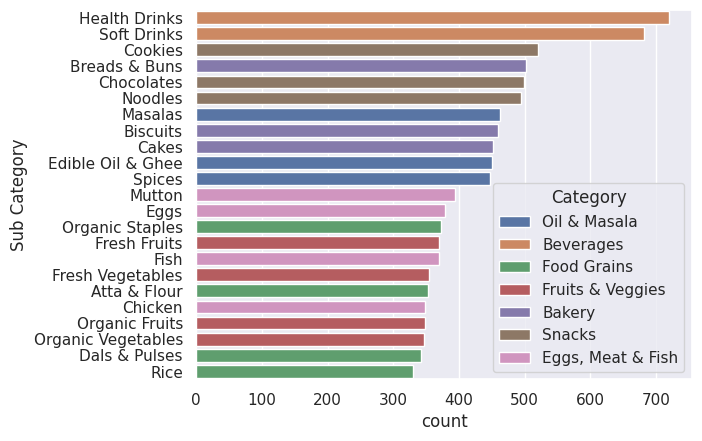

In [ ]:
sns.countplot(y = 'Sub Category', data=sales, order = sales['Sub Category'].value_counts().index, hue="Category" )


here, we can see top sub category sold are soft Drinks, Cookes and Lowest products are dal & Pulse, Rice.


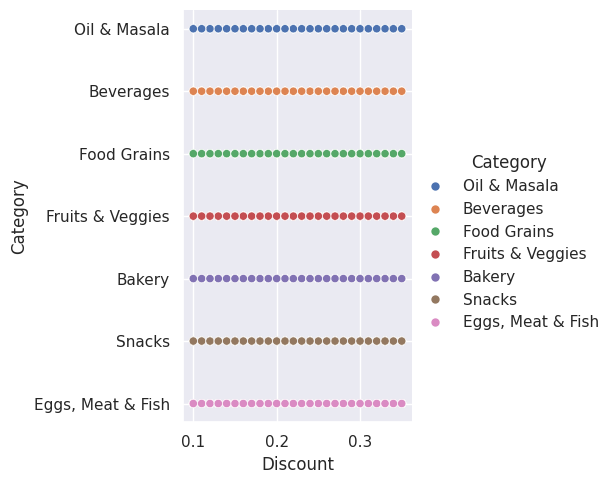

In [ ]:
sns.relplot(y='Category', x='Discount', data=sales, hue='Category')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Sales by region')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


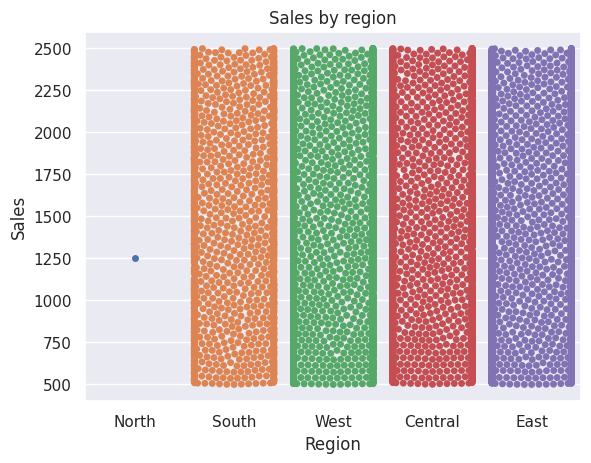

In [ ]:
 sns.swarmplot(x="Region",  y = "Sales",  hue = "Region", data =sales).set_title("Sales by region")

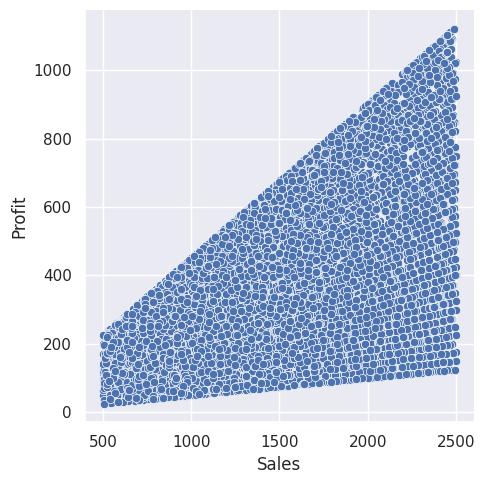

In [ ]:
sns.relplot(x="Sales", y="Profit", data=sales)

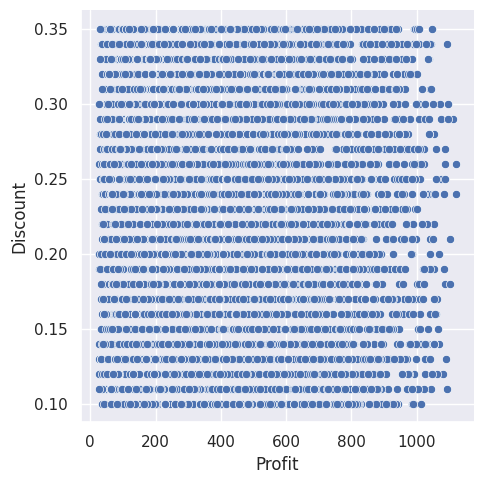

In [ ]:
sns.relplot(x="Profit", y="Discount", data=sales)